In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
df=pd.read_csv("C:/Users/Nageswar/AIML/GIT/aiml-ml-hyd-apr-19-batch-nageswara-kesireddi/External Lab/german_credit.csv")

df.head()



,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df.shape

(1000, 21)

In [5]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [6]:
df.isnull().any(axis=0)

default                       False
account_check_status          False
duration_in_month             False
credit_history                False
purpose                       False
credit_amount                 False
savings                       False
present_emp_since             False
installment_as_income_perc    False
personal_status_sex           False
other_debtors                 False
present_res_since             False
property                      False
age                           False
other_installment_plans       False
housing                       False
credits_this_bank             False
job                           False
people_under_maintenance      False
telephone                     False
foreign_worker                False
dtype: bool

In [7]:
#There are no missing values in the dataset. 

In [8]:
df.select_dtypes(include=['object']).count(axis=0)

account_check_status       1000
credit_history             1000
purpose                    1000
savings                    1000
present_emp_since          1000
personal_status_sex        1000
other_debtors              1000
property                   1000
other_installment_plans    1000
housing                    1000
job                        1000
telephone                  1000
foreign_worker             1000
dtype: int64

In [9]:
pd.get_dummies(df, columns=['account_check_status']).head()

,default,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,...,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account
0,0,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,0,1,0,0
1,1,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,own,1,skilled employee / official,1,none,yes,1,0,0,0
2,0,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,own,1,unskilled - resident,2,none,yes,0,0,0,1
3,0,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,for free,1,skilled employee / official,2,none,yes,0,1,0,0
4,1,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,for free,2,skilled employee / official,2,none,yes,0,1,0,0


In [10]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
# Print Shape of model data
df.shape

(1000, 21)

In [12]:
df.columns=["default","account_status","duration","cr_history","purpose","cr_amount","savings","Current_Experience","installment_as_income_perc","personal_status_sex","other_debtors","res_since","property","age","other_installments","housing","credits_this_bank","job","people","telephone","foreign_worker"]

In [13]:
#Non-numeric to numeric by get_dummies

In [14]:
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

#categorical variables labels
catvars = list(df.select_dtypes(include=['object']).columns)
numvars=list(df.select_dtypes(include=['int64']).columns)
d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = df[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", df[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

#One hot encoding, create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(df[catvars])

df_new = pd.concat([df[numvars], dummyvars], axis = 1)

print(df_new.shape)
df_new.head(2)

account_status :  ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']
account_status :  [1 0 3 2]
cr_history :  ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
cr_history :  [1 3 2 4 0]
purpose :  ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']
purpose :  [4 0 7 2 3 1 8 5 6 9]
savings :  ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']
savings :  [4 1 3 0 2]
Current_Experience :  ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']
Current_Experience :  [0 2 3 4 1]
personal_status_sex :  ['male : single' 'female : divorced/separated/

,default,duration,cr_amount,installment_as_income_perc,res_since,age,credits_this_bank,people,account_status_0 <= ... < 200 DM,account_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [15]:
cor =df_new.corr()['default'][:]
cor

default                                                                      1.000000
duration                                                                     0.214927
cr_amount                                                                    0.154739
installment_as_income_perc                                                   0.072404
res_since                                                                    0.002967
age                                                                         -0.091127
credits_this_bank                                                           -0.045732
people                                                                      -0.003015
account_status_0 <= ... < 200 DM                                             0.119581
account_status_< 0 DM                                                        0.258333
account_status_>= 200 DM / salary assignments for at least 1 year           -0.044009
account_status_no checking account                    

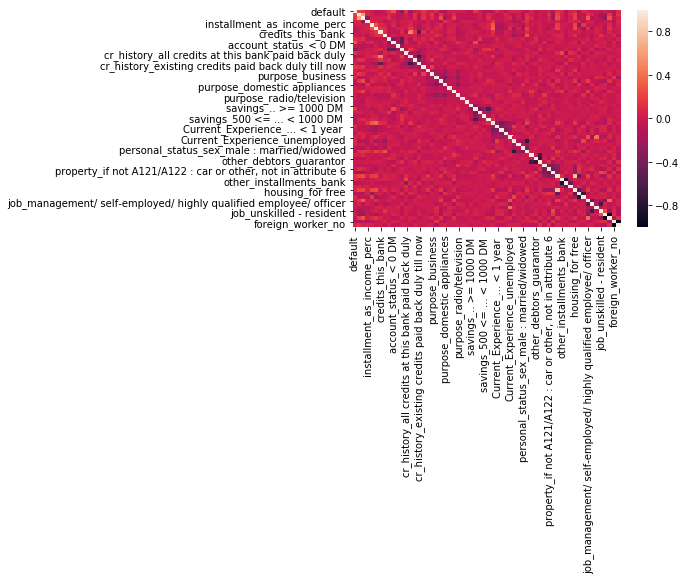

In [16]:
sns.heatmap(df_new.corr())

In [17]:
df_test=pd.DataFrame(cor)
cor_variables=df_test["default"]>0.9
cor_variables

default                                                                       True
duration                                                                     False
cr_amount                                                                    False
installment_as_income_perc                                                   False
res_since                                                                    False
age                                                                          False
credits_this_bank                                                            False
people                                                                       False
account_status_0 <= ... < 200 DM                                             False
account_status_< 0 DM                                                        False
account_status_>= 200 DM / salary assignments for at least 1 year            False
account_status_no checking account                                           False
cr_h

### Drop the original variables which are converted to dummy

In [18]:
catvars
df_new.head(2)

,default,duration,cr_amount,installment_as_income_perc,res_since,age,credits_this_bank,people,account_status_0 <= ... < 200 DM,account_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [19]:
from sklearn.model_selection import train_test_split

X= df_new.drop('default', axis=1)
y = df_new['default']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=1)
y.shape,X.shape

((1000,), (1000, 61))

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [20]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

In [21]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999).fit(X_train, y_train)
rfcl = rfcl.fit(X_train,y_train)

y_predict_rndForest = rfcl.predict(X_test)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [22]:

print("Accuracy Score is  : " ,rfcl.score(X_test, y_test))
print("Confusion matrix ")
print(metrics.confusion_matrix(y_test, y_predict_rndForest))



Accuracy Score is  :  0.7433333333333333
Confusion matrix 
[[197  17]
 [ 60  26]]


### Q6 Show the list of the features importance( 1 Marks)

In [23]:
for feature in zip(X.columns, rfcl.feature_importances_):
    print(feature)


('duration', 0.07203690111350995)
('cr_amount', 0.1001129917681643)
('installment_as_income_perc', 0.03698525786944085)
('res_since', 0.03336022705168979)
('age', 0.07812153082064333)
('credits_this_bank', 0.018879083535717503)
('people', 0.011346478347240464)
('account_status_0 <= ... < 200 DM', 0.016710984651212343)
('account_status_< 0 DM', 0.030929037780372422)
('account_status_>= 200 DM / salary assignments for at least 1 year', 0.007338137696241065)
('account_status_no checking account', 0.044759300856574556)
('cr_history_all credits at this bank paid back duly', 0.0076996527659395336)
('cr_history_critical account/ other credits existing (not at this bank)', 0.029383309856465072)
('cr_history_delay in paying off in the past', 0.00989199330396855)
('cr_history_existing credits paid back duly till now', 0.01463477769490509)
('cr_history_no credits taken/ all credits paid back duly', 0.012530925651724777)
('purpose_(vacation - does not exist?)', 0.005653993241467635)
('purpose_busi

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
from sklearn import svm

In [25]:
# Use below values
from sklearn.cluster import KMeans
from scipy.stats import zscore
num_folds = 10
seed = 77

model = svm.SVR()
df_new_z =df_new.apply(zscore)
df_new_z.head(2)


,default,duration,cr_amount,installment_as_income_perc,res_since,age,credits_this_bank,people,account_status_0 <= ... < 200 DM,account_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,-0.654654,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.42829,-0.606621,1.627770,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,-1.214598,1.214598,-0.196014,0.196014
1,1.527525,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.42829,1.648476,-0.614337,...,0.634448,-0.466933,-0.416784,0.766356,-0.149983,-0.5,0.823318,-0.823318,-0.196014,0.196014


In [26]:
#Validate the Random Forest model build above using k fold

In [27]:
array = df_new_z.values
X = array[:,1:61] 
y = array[:,0]   

seed = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)

print(results)
print("")
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.34425981 0.07518269 0.03474954 0.23589057 0.22692152 0.13110316
 0.04679111 0.26208561 0.26718759 0.17131596]

Accuracy: 17.955% (9.947%)


In [28]:
#Calculate Mean score
print("Mean is :",results.mean()*100)

Mean is : 17.954875521725526


In [29]:
# Calculate score standard deviation using std()


In [30]:
print("Standard Deviation:", results.std()*100.0)

Standard Deviation: 9.946840817509012


# Q8 Print the confusion matrix( 1 Marks)

In [31]:
print("Confusion matrix ")
arrConf=metrics.confusion_matrix(y_test, y_predict_rndForest)
print(arrConf)

Confusion matrix 
[[197  17]
 [ 60  26]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [32]:
print("Sensitivity is ",arrConf[0,0]/(arrConf[0,0]+arrConf[0,1]))
print("Precision is :",arrConf[0,0]/(arrConf[0,0]+arrConf[1,0]))

Sensitivity is  0.9205607476635514
Precision is : 0.7665369649805448


In [33]:
print(classification_report(y_test,y_predict_rndForest))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       214
           1       0.60      0.30      0.40        86

   micro avg       0.74      0.74      0.74       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.72      0.74      0.71       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [34]:
#Hint: Use roc_curve

RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 



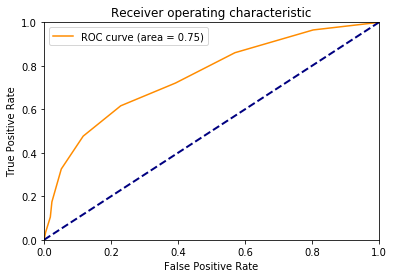

In [35]:
from sklearn.ensemble import RandomForestClassifier 

def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)
    print(randomforest,'\n')
    
    # Predict target variables y for test data
    y_pred = randomforest.predict_proba(X_test)[:,1]
    get_roc (y_test,y_pred)
    return

randomforestclf(X_train, y_train,X_test, y_test)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

Yet to work on the AUC

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [36]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [37]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [38]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.751
Standard deviation:  0.017891649200426175
